D:\UserApps\Programs\Python\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


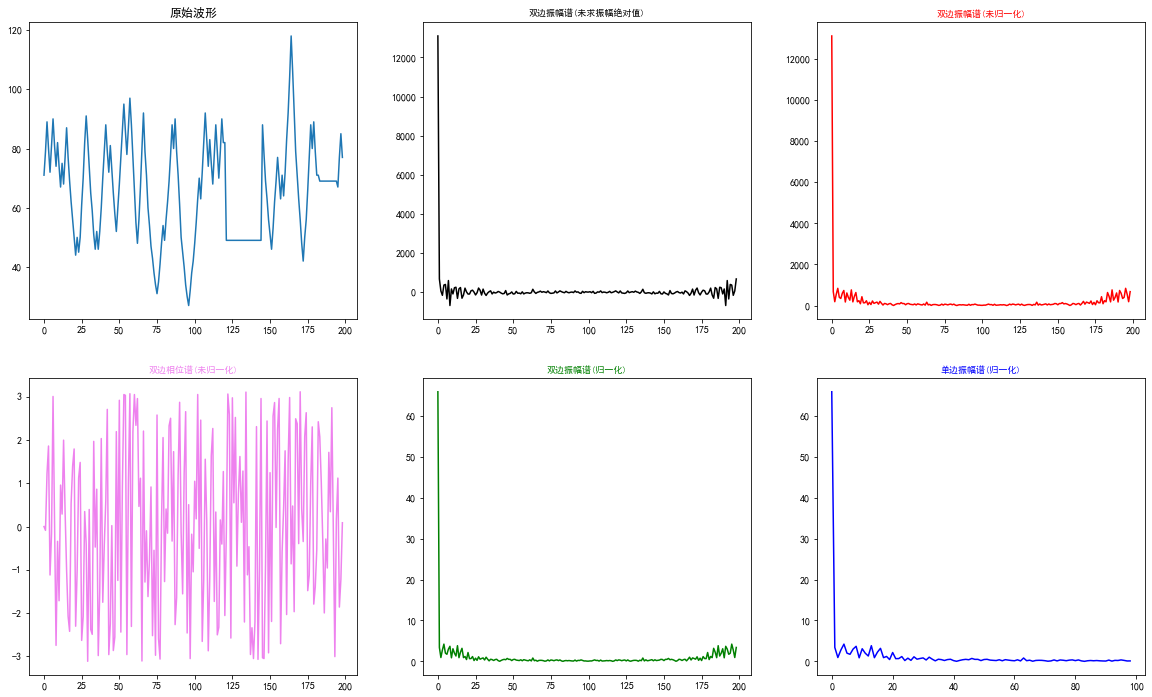

In [5]:
import numpy as np
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
 
mpl.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
mpl.rcParams['axes.unicode_minus']=False       #显示负号
 
plt.figure(figsize=(20,12))

#采样点选择1400个，因为设置的信号频率分量最高为600赫兹，根据采样定理知采样频率要大于信号频率2倍，所以这里设置采样频率为1400赫兹（即一秒内有1400个采样点，一样意思的）
# x=np.linspace(0,1,1400)      
# #设置需要采样的信号，频率分量有200，400和600
# y=7*np.sin(2*np.pi*200*x) + 5*np.sin(2*np.pi*400*x)+3*np.sin(2*np.pi*600*x)

y = [71,79,89,80,72,81,90,81,74,82,74,67,75,68,77,87,77,69,62,56,50,44,50,45,50,61,70,82,91,83,74,65,59,51,46,
52,46,52,60,70,79,88,79,72,81,73,65,58,52,60,68,77,86,95,86,78,87,97,88,77,66,55,48,56,67,80,92,79,71,60,54,47,43,38,34,
31,35,41,48,54,49,56,62,69,78,88,80,90,79,71,61,50,45,40,34,30,27,32,38,42,48,55,63,70,63,72,82,92,83,74,83,75,68,78,88,79,
70,79,90,82,82,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,88,78,69,63,56,51,46,53,62,69,77,70,
63,71,64,72,83,92,104,118,106,92,79,71,63,56,48,42,50,56,66,77,88,80,89,79,71,71,69,69,69,69,69,69,69,69,69,69,69,69,67,77,85,77]
x = np.linspace(0,1,len(y))
 
fft_y=fft(y)                          #快速傅里叶变换
 
N=len(y)
x = np.arange(N)             # 频率个数
half_x = x[range(int(N/2))]  #取一半区间
 
abs_y=np.abs(fft_y)                # 取复数的绝对值，即复数的模(双边频谱)
angle_y=np.angle(fft_y)            #取复数的角度
normalization_y=abs_y/N            #归一化处理（双边频谱）                              
normalization_half_y = normalization_y[range(int(N/2))]      #由于对称性，只取一半区间（单边频谱）
 
plt.subplot(231)
plt.plot(x,y)   
plt.title('原始波形')
 
plt.subplot(232)
plt.plot(x,fft_y,'black')
plt.title('双边振幅谱(未求振幅绝对值)',fontsize=9,color='black') 
 
plt.subplot(233)
plt.plot(x,abs_y,'r')
plt.title('双边振幅谱(未归一化)',fontsize=9,color='red') 
 
plt.subplot(234)
plt.plot(x,angle_y,'violet')
plt.title('双边相位谱(未归一化)',fontsize=9,color='violet')
 
plt.subplot(235)
plt.plot(x,normalization_y,'g')
plt.title('双边振幅谱(归一化)',fontsize=9,color='green')
 
plt.subplot(236)
plt.plot(half_x,normalization_half_y,'blue')
plt.title('单边振幅谱(归一化)',fontsize=9,color='blue')
 
plt.show()
 

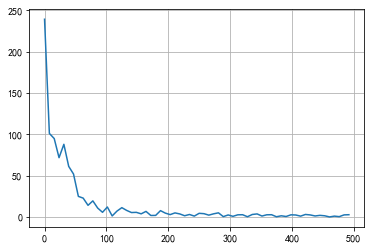

In [10]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
Fs =1000      # 采样频率
f1 =390       # 信号频率1
f2 = 2e3      # 信号频率2
t=np.linspace(0,1,Fs)   # 生成 1s 的实践序列   
noise1 = np.random.random(1000)      # 0-1 之间的随机噪声
noise2 = np.random.normal(1,10,1000)
#产生的是一个10e3的高斯噪声点数组集合（均值为：1，标准差：10）
y=2*np.sin(2*np.pi*f1*t)+5*np.sin(2*np.pi*f2*t)+noise2

y = [114,104,93,84,94,107,119,138,155,135,119,102,85,71,61,
53,46,52,58,67,82,99,118,151,177,209,251,297,346,398,453,510,618,697,578,511,440,
369,304,244,192,151,115,88,70,57,48,43,39,34,29,21,15,20,23,28,32,37,42,47,55,63,74,86,100,85,72,80,93,105,118,138,116,103,
90,78,65,53,42,30,18,15,16,19,21,34,46,58,70,82,94,106,124,143,128,106,94,82,71,60,48,37,25,18,16,20,32,44,55,66,77,88,100,120,137]

t=np.linspace(0,1,len(y))   # 生成 1s 的实践序列   

def FFT (Fs,data):
    L = len (data)                        # 信号长度
    N = int(np.power(2, np.ceil(np.log2(L))))    # 下一个最近二次幂
    FFT_y1 = np.abs(fft(data,N))/L*2      # N点FFT 变化,但处于信号长度
    Fre = np.arange(int(N/2))*Fs/N        # 频率坐标
    FFT_y1 = FFT_y1[range(int(N/2))]      # 取一半
    return Fre, FFT_y1

Fre, FFT_y1 = FFT(Fs,y)
plt.figure
plt.plot(Fre,FFT_y1)
plt.grid()
plt.show()

In [ ]:
import numpy as np
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
 
mpl.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
mpl.rcParams['axes.unicode_minus']=False       #显示负号
 
plt.figure(figsize=(20,12))

y = [71,79,89,80,72,81,90,81,74,82,74,67,75,68,77,87,77,69,62,56,50,44,50,45,50,61,70,82,91,83,74,65,59,51,46,
52,46,52,60,70,79,88,79,72,81,73,65,58,52,60,68,77,86,95,86,78,87,97,88,77,66,55,48,56,67,80,92,79,71,60,54,47,43,38,34,
31,35,41,48,54,49,56,62,69,78,88,80,90,79,71,61,50,45,40,34,30,27,32,38,42,48,55,63,70,63,72,82,92,83,74,83,75,68,78,88,79,
70,79,90,82,82,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,88,78,69,63,56,51,46,53,62,69,77,70,
63,71,64,72,83,92,104,118,106,92,79,71,63,56,48,42,50,56,66,77,88,80,89,79,71,71,69,69,69,69,69,69,69,69,69,69,69,69,67,77,85,77]
x = np.linspace(0,1,len(y))
 
fft_y=fft(y)                          #快速傅里叶变换
 
N=len(y)
x = np.arange(N)             # 频率个数
half_x = x[range(int(N/2))]  #取一半区间
 
abs_y=np.abs(fft_y)                # 取复数的绝对值，即复数的模(双边频谱)
angle_y=np.angle(fft_y)            #取复数的角度
normalization_y=abs_y/N            #归一化处理（双边频谱）                              
normalization_half_y = normalization_y[range(int(N/2))]      #由于对称性，只取一半区间（单边频谱）
 
plt.subplot(231)
plt.plot(x,y)   
plt.title('原始波形')
 
plt.subplot(232)
plt.plot(x,fft_y,'black')
plt.title('双边振幅谱(未求振幅绝对值)',fontsize=9,color='black') 
 
plt.subplot(233)
plt.plot(x,abs_y,'r')
plt.title('双边振幅谱(未归一化)',fontsize=9,color='red') 
 
plt.subplot(234)
plt.plot(x,angle_y,'violet')
plt.title('双边相位谱(未归一化)',fontsize=9,color='violet')
 
plt.subplot(235)
plt.plot(x,normalization_y,'g')
plt.title('双边振幅谱(归一化)',fontsize=9,color='green')
 
plt.subplot(236)
plt.plot(half_x,normalization_half_y,'blue')
plt.title('单边振幅谱(归一化)',fontsize=9,color='blue')
 
plt.show()
 

(5, 199)


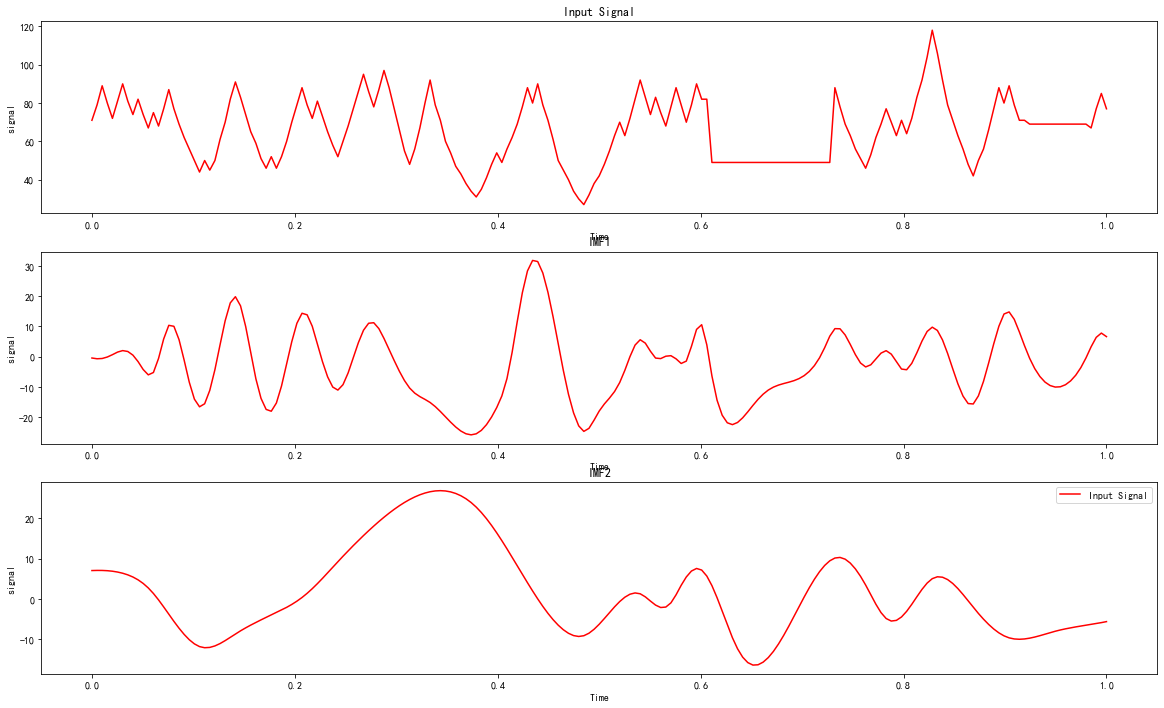

In [17]:
# from pyemd import EMD
from PyEMD import EMD
#import EMD-signal
import numpy as np
import matplotlib.pyplot as plt

s = np.random.random(100)
emd = EMD()
#IMFs = emd(s)

t = np.linspace(0,1,1000)
Signal = np.cos((22*np.pi)*t**2) + 6*t**2

plt.figure(figsize=(20,12))
Signal = [71,79,89,80,72,81,90,81,74,82,74,67,75,68,77,87,77,69,62,56,50,44,50,45,50,61,70,82,91,83,74,65,59,51,46,
52,46,52,60,70,79,88,79,72,81,73,65,58,52,60,68,77,86,95,86,78,87,97,88,77,66,55,48,56,67,80,92,79,71,60,54,47,43,38,34,
31,35,41,48,54,49,56,62,69,78,88,80,90,79,71,61,50,45,40,34,30,27,32,38,42,48,55,63,70,63,72,82,92,83,74,83,75,68,78,88,79,
70,79,90,82,82,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,88,78,69,63,56,51,46,53,62,69,77,70,
63,71,64,72,83,92,104,118,106,92,79,71,63,56,48,42,50,56,66,77,88,80,89,79,71,71,69,69,69,69,69,69,69,69,69,69,69,69,67,77,85,77]
t = np.linspace(0,1,len(Signal))
#print(Signal)
IMFs = emd(np.array(Signal))
print(IMFs.shape)

# plt.figure(figsize=[40,20])
plt.subplot(311)
plt.plot(t,Signal,'r',label = "Input Signal")
plt.xlabel("Time")
plt.ylabel("signal")
plt.title("Input Signal")

plt.subplot(312)
plt.plot(t,IMFs[1,:],'r',label = "Input Signal")
plt.xlabel("Time")
plt.ylabel("signal")
plt.title("IMF1")

plt.subplot(313)
plt.plot(t,IMFs[2,:],'r',label = "Input Signal")
plt.xlabel("Time")
plt.ylabel("signal")
plt.title("IMF2")


plt.legend()
plt.show()


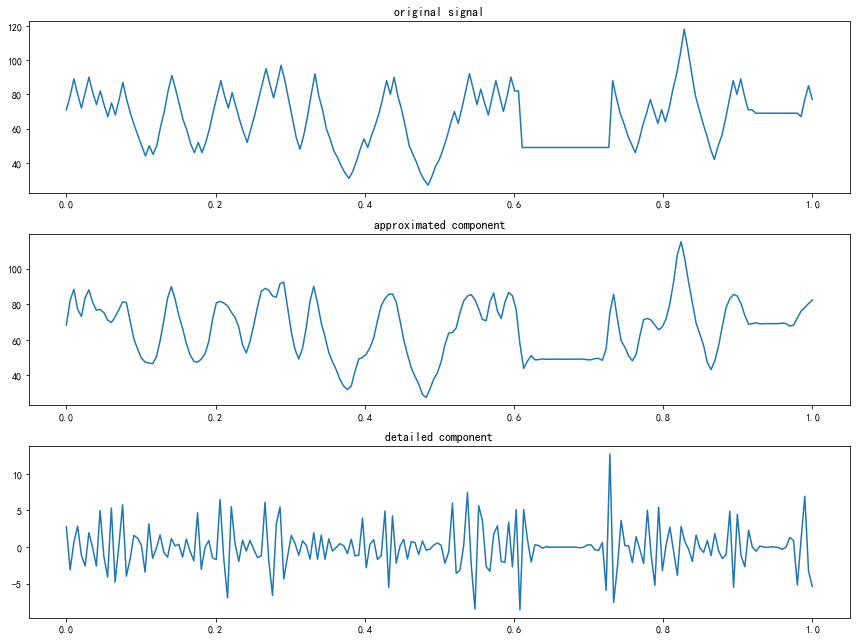

In [24]:
import pywt
import numpy as np
import matplotlib.pyplot as plt 

Signal = [71,79,89,80,72,81,90,81,74,82,74,67,75,68,77,87,77,69,62,56,50,44,50,45,50,61,70,82,91,83,74,65,59,51,46,
52,46,52,60,70,79,88,79,72,81,73,65,58,52,60,68,77,86,95,86,78,87,97,88,77,66,55,48,56,67,80,92,79,71,60,54,47,43,38,34,
31,35,41,48,54,49,56,62,69,78,88,80,90,79,71,61,50,45,40,34,30,27,32,38,42,48,55,63,70,63,72,82,92,83,74,83,75,68,78,88,79,
70,79,90,82,82,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,88,78,69,63,56,51,46,53,62,69,77,70,
63,71,64,72,83,92,104,118,106,92,79,71,63,56,48,42,50,56,66,77,88,80,89,79,71,71,69,69,69,69,69,69,69,69,69,69,69,69,67,77,85,77]
t = np.linspace(0,1,len(Signal))
t1 = np.linspace(0,1,len(Signal)+1)


wavename = 'db5'
cA, cD = pywt.dwt(Signal, wavename)
ya = pywt.idwt(cA, None, wavename,'smooth') # approximated component
yd = pywt.idwt(None, cD, wavename,'smooth') # detailed component

x = t
plt.figure(figsize=(12,9))
plt.subplot(311)
plt.plot(x, Signal)
plt.title('original signal')
plt.subplot(312)

x = t1
plt.plot(x, ya)
plt.title('approximated component')
plt.subplot(313)
plt.plot(x, yd)
plt.title('detailed component')
plt.tight_layout()
plt.show()

D:\UserApps\Programs\Python\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


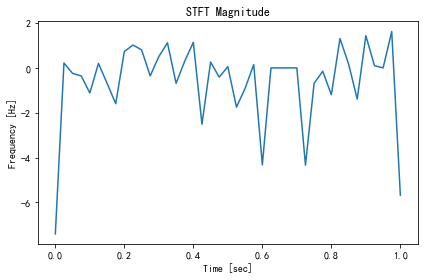

In [34]:
import scipy.signal as signal
import matplotlib.pyplot as plt

def stft(x, **params):
    '''
    :param x: 输入信号
    :param params: {fs:采样频率；
                    window:窗。默认为汉明窗；
                    nperseg： 每个段的长度，默认为256，
                    noverlap:重叠的点数。指定值时需要满足COLA约束。默认是窗长的一半，
                    nfft：fft长度，
                    detrend：（str、function或False）指定如何去趋势，默认为Flase，不去趋势。
                    return_onesided：默认为True，返回单边谱。
                    boundary：默认在时间序列两端添加0
                    padded：是否对时间序列进行填充0（当长度不够的时候），
                    axis：可以不必关心这个参数}
    :return: f:采样频率数组；t:段时间数组；Zxx:STFT结果
    '''
    f, t, zxx = signal.stft(x, **params) 
    return f, t, zxx

Signal = [71,79,89,80,72,81,90,81,74,82,74,67,75,68,77,87,77,69,62,56,50,44,50,45,50,61,70,82,91,83,74,65,59,51,46,
52,46,52,60,70,79,88,79,72,81,73,65,58,52,60,68,77,86,95,86,78,87,97,88,77,66,55,48,56,67,80,92,79,71,60,54,47,43,38,34,
31,35,41,48,54,49,56,62,69,78,88,80,90,79,71,61,50,45,40,34,30,27,32,38,42,48,55,63,70,63,72,82,92,83,74,83,75,68,78,88,79,
70,79,90,82,82,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,88,78,69,63,56,51,46,53,62,69,77,70,
63,71,64,72,83,92,104,118,106,92,79,71,63,56,48,42,50,56,66,77,88,80,89,79,71,71,69,69,69,69,69,69,69,69,69,69,69,69,67,77,85,77]
t0 = np.linspace(0,1,len(Signal))
f, t, zxx = signal.stft(Signal, nperseg = 10)
t0 = np.linspace(0,1,zxx.shape[-1])
# plt.pcolormesh(t, f, np.abs(zxx))
# plt.colorbar()
plt.plot(t0, zxx[-1,:])

plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout()
plt.show()

[79.75, 79.75, 79.75, 79.75, 79.75, 67.25, 67.25, 67.25, 67.25, 67.25, 67.25, 67.25, 67.25, 67.25, 67.25, 67.25, 67.25, 67.25, 56.5, 56.5, 56.5, 64.0, 64.0, 57.25, 54.75, 54.75, 57.25, 58.75, 58.75, 60.25, 60.25, 60.25, 60.25, 60.25, 60.25, 60.25, 60.25, 60.25, 60.25, 60.25, 67.75, 78.75, 78.75, 73.5, 73.5, 73.5, 73.5, 73.5, 73.5]


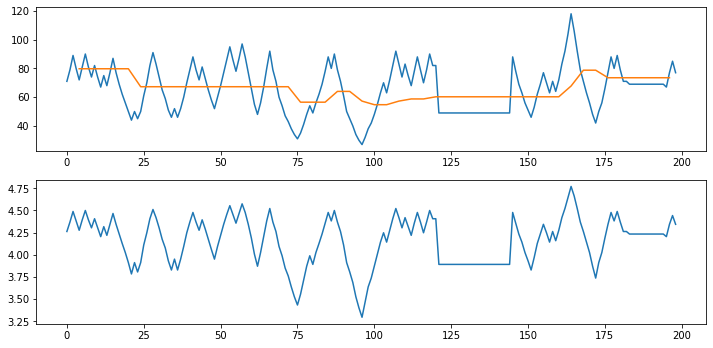

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math

s = [71,79,89,80,72,81,90,81,74,82,74,67,75,68,77,87,77,69,62,56,50,44,50,45,50,61,70,82,91,83,74,65,59,51,46,
52,46,52,60,70,79,88,79,72,81,73,65,58,52,60,68,77,86,95,86,78,87,97,88,77,66,55,48,56,67,80,92,79,71,60,54,47,43,38,34,
31,35,41,48,54,49,56,62,69,78,88,80,90,79,71,61,50,45,40,34,30,27,32,38,42,48,55,63,70,63,72,82,92,83,74,83,75,68,78,88,79,
70,79,90,82,82,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,88,78,69,63,56,51,46,53,62,69,77,70,
63,71,64,72,83,92,104,118,106,92,79,71,63,56,48,42,50,56,66,77,88,80,89,79,71,71,69,69,69,69,69,69,69,69,69,69,69,69,67,77,85,77]
# t = np.linspace(0,len(s),len(s))
t = np.arange(0,len(s),1)


def moveFilter(s):
    num_th = 4
    last_stable = -1
    m_frictionFactor = 20
    res = []
    idx = []
    for i in range(len(s)//num_th):
        # print(i)
        mean = np.mean(s[i*num_th:(i+1)*num_th])
        std = np.std(s[i*num_th:(i+1)*num_th])
        # print(std)
        # print(mean)
        if last_stable == -1:
            last_stable = mean
        else:
            F = mean - last_stable

            # print("mean: ", mean, "last: ", last_stable, "F:", F)
            if F >= 0:
                F = max(0, F - m_frictionFactor)
                # F = F - m_frictionFactor
            else:
                F = min(0, F + m_frictionFactor)
                # F = F + m_frictionFactor

            delta = F * 1
            # print(mean, ", ", F//(std+1), ", ", delta, ", ", last_stable)
            last_stable = last_stable + delta
        
        res.append(last_stable)
        idx.append((i+1)*num_th)
    return res, idx

res, idx = moveFilter(s)
print(res)

plt.figure(figsize=(12,9))
plt.subplot(311)
plt.plot(t, s)

lg = [math.log(i) for i in s]
plt.subplot(312)
plt.plot(t, lg)

plt.subplot(311)
plt.plot(idx, res)
plt.show()


求和： 418
个数： 17
平均值: 24.58823529411765
中位数: 20.0
最大值: 100
最小值: 15
极差: 85
四分位差 4
标准差: 19.05119673106687
方差: 362.948096885813
离散系数: 0.7748094364309492
偏度: 3.304523825087589
峰度: 9.803248497497412


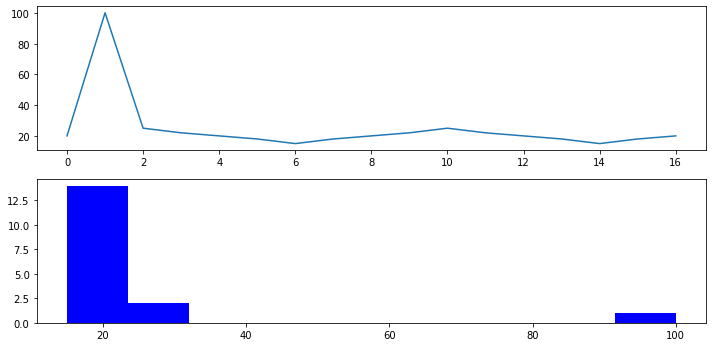

In [72]:
import numpy as np
import stats as sts
import matplotlib.pyplot as plt
import random

scores = [31, 24, 23, 25, 14, 25, 13, 12, 14, 23,
          32, 34, 43, 41, 21, 23, 26, 26, 34, 42,
          43, 25, 24, 23, 24, 44, 23, 14, 52,32,
          42, 44, 35, 28, 17, 21, 32, 42, 12, 34]

scores = [20,24,25,22,20,18,15,18,20,22,25,22,20,18,15,18,20]

# sigma = 2
# mu = 50
# scores = np.random.normal(50, sigma, 1000)

# scores = [71,79,89,80,72,81,90,81,74,82,74,67,75,68,77,87,77,69,62,56,50,44,50,45,50,61,70,82,91,83,74,65,59,51,46,
# 52,46,52,60,70,79,88,79,72,81,73,65,58,52,60,68,77,86,95,86,78,87,97,88,77,66,55,48,56,67,80,92,79,71,60,54,47,43,38,34,
# 31,35,41,48,54,49,56,62,69,78,88,80,90,79,71,61,50,45,40,34,30,27,32,38,42,48,55,63,70,63,72,82,92,83,74,83,75,68,78,88,79,
# 70,79,90,82,82,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,88,78,69,63,56,51,46,53,62,69,77,70,
# 63,71,64,72,83,92,104,118,106,92,79,71,63,56,48,42,50,56,66,77,88,80,89,79,71,71,69,69,69,69,69,69,69,69,69,69,69,69,67,77,85,77]

#集中趋势的度量
print('求和：',np.sum(scores))
print('个数：',len(scores))
print('平均值:',np.mean(scores))
print('中位数:',np.median(scores))
# print('众数:',sts.mode(scores))
# print('上四分位数',sts.quantile(scores,p=0.25))
# print('下四分位数',sts.quantile(scores,p=0.75))
#离散趋势的度量
print('最大值:',np.max(scores))
print('最小值:',np.min(scores))
print('极差:',np.max(scores)-np.min(scores))
print('四分位差',sts.quantile(scores,p=0.75)-sts.quantile(scores,p=0.25))
print('标准差:',np.std(scores))
print('方差:',np.var(scores))
print('离散系数:',np.std(scores)/np.mean(scores))
#偏度与峰度的度量
print('偏度:',sts.skewness(scores))
print('峰度:',sts.kurtosis(scores))


# t = np.linspace(0,len(s),len(s))
t = np.arange(0,len(scores),1)
plt.figure(figsize=(12,9))
plt.subplot(311)
plt.plot(scores)
plt.subplot(312)
count, bins, ignored = plt.hist(scores, 10, color='b')
# plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')


plt.show()